BikeStores è una catena di negozi che vende prodotti per le biciclette. Le informazioni relative a questa catena sono caricate in un file xls al link: 

https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true

Il file xsl contiene più fogli, uno per ogni dataset. Utilizzando le informazioni presenti al link:

https://pythonbasics.org/read-excel/

caricare i fogli "categories", "brands" e "products" in tre dataframe distinti. Scrivere poi le istruzioni per estrarre le
seguenti informazioni:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install --upgrade xlrd

In [8]:
dfCategories = pd.read_excel("https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true", sheet_name = "categories")
dfCategories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [9]:
dfBrands = pd.read_excel("https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true", sheet_name = "brands")
dfBrands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [10]:
dfProducts = pd.read_excel("https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true", sheet_name = "products")
dfProducts

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


1. Il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria.

In [11]:
dfCategories_complessivo =  pd.merge(dfBrands, dfProducts, how = "inner", on = ["brand_id"])
dfCategories_complessivo1 = pd.merge(dfCategories_complessivo, dfCategories, how = "inner", on = ["category_id"])
dfCategories_complessivo1[['product_name', 'brand_name', 'category_name']]

,product_name,brand_name,category_name
0,Electra Townie Original 21D - 2016,Electra,Cruisers Bicycles
1,Electra Cruiser 1 (24-Inch) - 2016,Electra,Cruisers Bicycles
2,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,Electra,Cruisers Bicycles
3,Electra Moto 1 - 2016,Electra,Cruisers Bicycles
4,Electra Townie Original 7D EQ - 2016,Electra,Cruisers Bicycles
...,...,...,...
316,Trek Checkpoint ALR 5 - 2019,Trek,Road Bikes
317,Trek Checkpoint ALR 5 Women's - 2019,Trek,Road Bikes
318,Trek Checkpoint SL 5 Women's - 2019,Trek,Road Bikes
319,Trek Checkpoint SL 6 - 2019,Trek,Road Bikes


In [12]:
dfCategories_complessivo1

,brand_id,brand_name,product_id,product_name,category_id,model_year,list_price,category_name
0,1,Electra,12,Electra Townie Original 21D - 2016,3,2016,549.99,Cruisers Bicycles
1,1,Electra,13,Electra Cruiser 1 (24-Inch) - 2016,3,2016,269.99,Cruisers Bicycles
2,1,Electra,14,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,3,2016,269.99,Cruisers Bicycles
3,1,Electra,15,Electra Moto 1 - 2016,3,2016,529.99,Cruisers Bicycles
4,1,Electra,16,Electra Townie Original 7D EQ - 2016,3,2016,599.99,Cruisers Bicycles
...,...,...,...,...,...,...,...,...
316,9,Trek,317,Trek Checkpoint ALR 5 - 2019,7,2019,1999.99,Road Bikes
317,9,Trek,318,Trek Checkpoint ALR 5 Women's - 2019,7,2019,1999.99,Road Bikes
318,9,Trek,319,Trek Checkpoint SL 5 Women's - 2019,7,2019,2799.99,Road Bikes
319,9,Trek,320,Trek Checkpoint SL 6 - 2019,7,2019,3799.99,Road Bikes


2. Il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.

In [13]:
dfNumPro = dfCategories_complessivo1.groupby('category_name').count()[['brand_id']].rename(columns = {"brand_id": "NProdotti"}).reset_index()
dfNumPro

,category_name,NProdotti
0,Children Bicycles,59
1,Comfort Bicycles,30
2,Cruisers Bicycles,78
3,Cyclocross Bicycles,10
4,Electric Bikes,24
5,Mountain Bikes,60
6,Road Bikes,60


3. Il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti.

In [14]:
dfNumbrand = dfCategories_complessivo1.groupby('brand_name').count()[['brand_id']].rename(columns = {"brand_id": "NProdotti"}).reset_index()
dfNumbrand

,brand_name,NProdotti
0,Electra,118
1,Haro,10
2,Heller,3
3,Pure Cycles,3
4,Ritchey,1
5,Strider,3
6,Sun Bicycles,23
7,Surly,25
8,Trek,135


4. I nomi dei prodotti della marca Trek.

In [15]:
dfCategories_complessivo1[dfCategories_complessivo1['brand_name'] == "Trek"][["product_name"]]

,product_name
114,Trek Boy's Kickster - 2015/2017
115,Trek Girl's Kickster - 2017
116,Trek Precaliber 12 Boys - 2017
117,Trek Precaliber 12 Girls - 2017
118,Trek Precaliber 16 Boys - 2017
...,...
316,Trek Checkpoint ALR 5 - 2019
317,Trek Checkpoint ALR 5 Women's - 2019
318,Trek Checkpoint SL 5 Women's - 2019
319,Trek Checkpoint SL 6 - 2019


5. I prodotti delle categorie che hanno la parola 'Bikes' nel nome.

In [16]:
dfCategories_complessivo1[dfCategories_complessivo1['category_name'].str.contains("Bikes")][["product_name"]]

,product_name
167,Electra Loft Go! 8i - 2018
168,Electra Townie Go! 8i - 2017/2018
169,Electra Townie Go! 8i Ladies' - 2018
170,Electra Townie Commute Go! - 2018
171,Electra Townie Commute Go! Ladies' - 2018
...,...
316,Trek Checkpoint ALR 5 - 2019
317,Trek Checkpoint ALR 5 Women's - 2019
318,Trek Checkpoint SL 5 Women's - 2019
319,Trek Checkpoint SL 6 - 2019


6. La categoria che ha il prodotto che costa di più.

In [17]:
a = dfCategories_complessivo1["list_price"].max()
dfCategories_complessivo1[dfCategories_complessivo1['list_price'] == a][["category_name"]]

,category_name
290,Road Bikes


7. I brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti.

In [18]:
dfCategories_complessivo1['brand_name'].value_counts()[dfCategories_complessivo1['brand_name'].value_counts() >= 100]

Trek       135
Electra    118
Name: brand_name, dtype: int64

8. La marca del prodotto 'Electra Townie Original 21D - 2016'.

In [19]:
dfCategories_complessivo1[dfCategories_complessivo1['product_name'] == 'Electra Townie Original 21D - 2016'][['brand_name', 'product_id']]

,brand_name,product_id
0,Electra,12
137,Electra,24


9. Il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti.

In [20]:
dfCategories_complessivo1.groupby('model_year').count()[['brand_id']].rename(columns = {"brand_id": "NProdotti"}).reset_index()

,model_year,NProdotti
0,2016,26
1,2017,85
2,2018,204
3,2019,6


10. Visualizzare i grafici più adatti per le richieste 2, 3, 7 e 9.

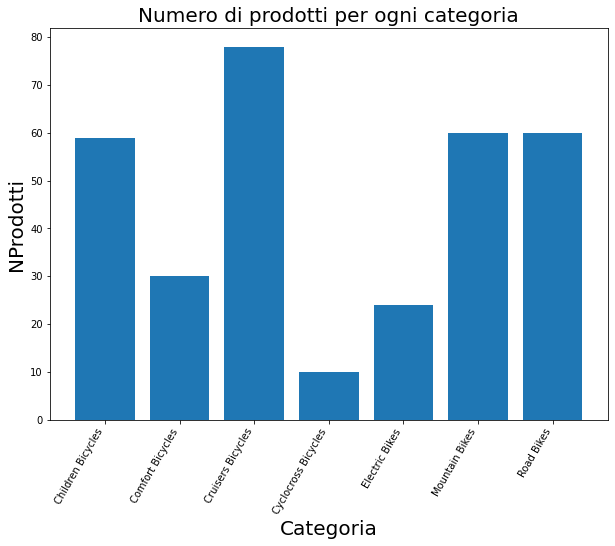

In [21]:
dfNumProG = dfCategories_complessivo1.groupby('category_name').count()[['brand_id']].rename(columns = {"brand_id": "NProdotti"})
dfNumProG
x = list(dfNumProG.index)
y = list(dfNumProG["NProdotti"])
fig,ax=plt.subplots(figsize = (10, 8))
ax.set_title("Numero di prodotti per ogni categoria", fontsize = 20)
ax.set_xlabel("Categoria", fontsize = 20)
ax.set_ylabel("NProdotti", fontsize = 20)
fig.autofmt_xdate(rotation = 60)
ax.bar(x, y)
plt.show()

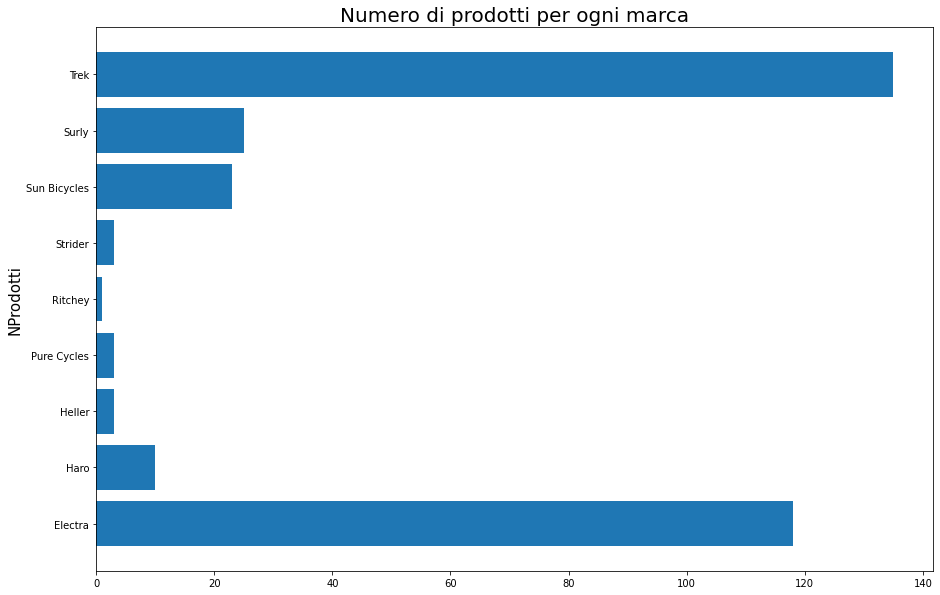

In [22]:
dfNumbrandG = dfCategories_complessivo1.groupby('brand_name').count()[['brand_id']].rename(columns={"brand_id": "NProdotti"})
dfNumbrandG

x1 = list(dfNumbrandG.index)
y1 = list(dfNumbrandG['NProdotti'])
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_title('Numero di prodotti per ogni marca', fontsize = 20)
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('NProdotti', fontsize = 15)
ax.barh(x1, y1)
plt.show()

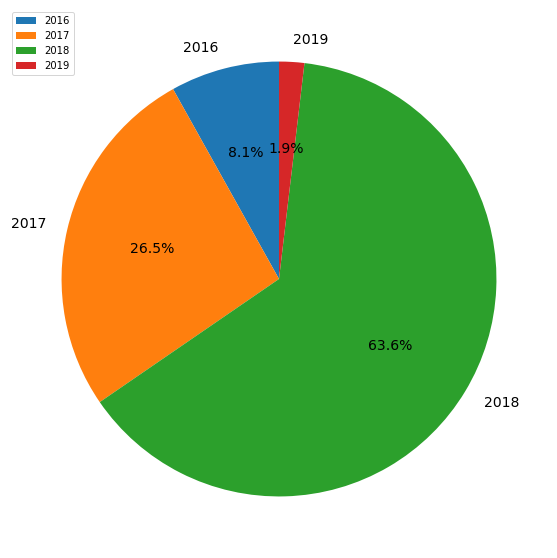

In [23]:
df2 = dfCategories_complessivo1.groupby('model_year').count()[['brand_id']].rename(columns={"brand_id": "NProdotti"})
df2

labelspie = list(df2.index)
sizes = list(df2['NProdotti'])
fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(sizes, labels = labelspie, autopct = '%1.1f%%', textprops = {'fontsize': 14}, startangle = 90)
plt.legend(labelspie)
plt.show()